# NLP Regular expressions

### Content of tasks: https://github.com/apohllo/pjn/blob/master/1-regexp.md

In [3]:
# full data preprocessing has been provided in script scripts.py in the same dir

In [7]:
import json
import os.path
from glob import glob
import os
import re
import io
import matplotlib.pyplot as plt

In [6]:
def getAllValues(values_files):
    i = 0
    final_values = []
    for file in values_files:
        with io.open(file, "r") as datafile:
            for line in datafile:
                values = line.split(";")
                for value in values:
                    try:
                        float_val = float(value)
                        final_values.append(float_val)
                    except ValueError:
                        i = i+1
                        print("Could not convert to float: ", value)
            print("Couldn't convert to float: ", i)
            return final_values

digitValuesFile = "../data/full-results/norm-full-values2015.txt"
digitShortcutsFile = "../data/full-results/norm-full-values2015-shortcuts.txt"
values_files = [digitValuesFile, digitShortcutsFile]
all_values = getAllValues(values_files)

Could not convert to float:  120897.227.59
Could not convert to float:  6890.75.00
Could not convert to float:  24.938.17
Could not convert to float:  3.104.00
Could not convert to float:  75.378.72
Could not convert to float:  53.605.92
Could not convert to float:  1528.461.90
Could not convert to float:  06.3399.21
Could not convert to float:  06.3399.21
Could not convert to float:  101.32082.41
Could not convert to float:  110.625.40
Could not convert to float:  20.482.18
Could not convert to float:  635.659.73
Could not convert to float:  2.946.70
Could not convert to float:  130.701.89
Could not convert to float:  219.895.21
Could not convert to float:  16.272.80
Could not convert to float:  8422.181.77
Could not convert to float:  256.639.40
Could not convert to float:  261.40.39
Could not convert to float:  383.333.33
Could not convert to float:  12256.798.69
Could not convert to float:  2.220.59
Could not convert to float:  1.628.72
Could not convert to float:  2.739.92
Could n

Could not convert to float:  246.897.33
Could not convert to float:  3593.93.47
Could not convert to float:  459.105.94
Could not convert to float:  4.950.75
Could not convert to float:  4.308.88
Could not convert to float:  49.377.41
Could not convert to float:  148.295.43
Could not convert to float:  28.872.65
Could not convert to float:  137.408.24
Could not convert to float:  2.897.74
Could not convert to float:  1866.796.27
Could not convert to float:  1538.424.77
Could not convert to float:  11.762.50
Could not convert to float:  59.999.00
Could not convert to float:  1.726.18
Could not convert to float:  10.179.76
Could not convert to float:  10.435.43
Could not convert to float:  9.234.00
Could not convert to float:  6.588.88
Could not convert to float:  8.451.84
Could not convert to float:  1.633.48
Could not convert to float:  4914.36.02
Could not convert to float:  529242.724.26
Could not convert to float:  1.500.00
Could not convert to float:  14.99.15.99
Could not convert 

Elements matched:
[  8.04107000e+05   2.00000000e+00   1.00000000e+00   5.00000000e+00
   6.00000000e+00   4.00000000e+00   2.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Bins boundaries:
[  0.00000000e+00   5.00000000e+10   1.00000000e+11   1.50000000e+11
   2.00000000e+11   2.50000000e+11   3.00000000e+11   3.50000000e+11
   4.00000000e+11   4.50000000e+11   5.00000000e+11   5.50000000e+11
   6.00000000e+11   6.50000000e+11   7.00000000e+11   7.50000000e+11
   8.00000000e+11   8.50000000e+11   9.00000000e+11   9.50000000e+11
   1.00000000e+12]


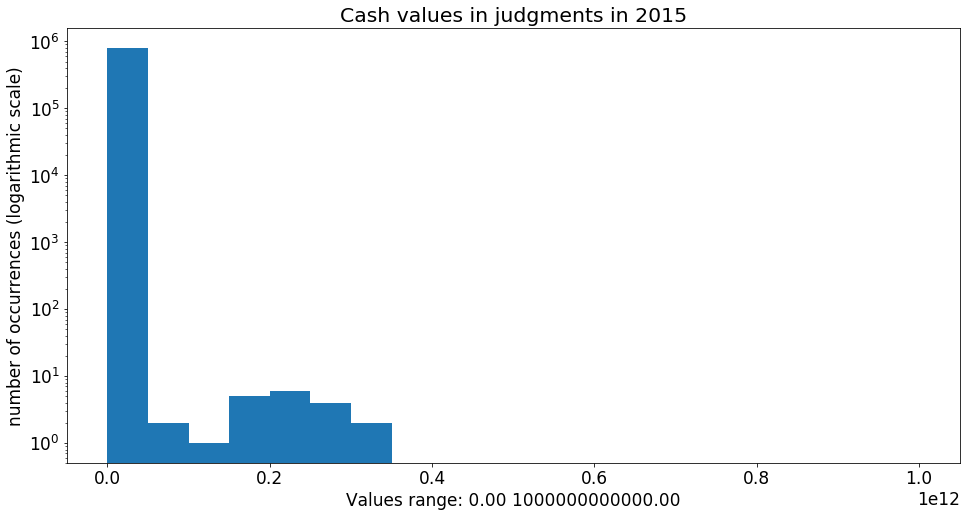

In [42]:
def plotHistogram(values, min_val, max_val, bins, show_info=True, logarithmic=True):
    events, edges, patches = plt.hist(values, range=(min_val, max_val), bins=bins, log=logarithmic)
    if show_info:
        print("Elements matched:")
        print(events)
        print("Bins boundaries:")
        print(edges)

    plt.xlabel('Values range: %.2f %.2f' % (min_val, max_val))
    plt.ylabel('number of occurrences (logarithmic scale)')
    plt.title('Cash values in judgments in 2015')
    plt.rcParams["figure.figsize"] = [14,7]
    plt.rcParams.update({'font.size': 17})
    plt.show()

plotHistogram(all_values, min(all_values), 1e12, 20)

Elements matched:
[  6.57997000e+05   4.60370000e+04   2.33490000e+04   1.25660000e+04
   9.51200000e+03   5.84100000e+03   5.29600000e+03   3.56600000e+03
   3.47600000e+03   2.27100000e+03   2.88100000e+03   1.48400000e+03
   1.73100000e+03   1.15400000e+03   1.10800000e+03   8.71000000e+02
   9.91000000e+02   6.38000000e+02   7.59000000e+02   1.43100000e+03]
Bins boundaries:
[       0.    50000.   100000.   150000.   200000.   250000.   300000.
   350000.   400000.   450000.   500000.   550000.   600000.   650000.
   700000.   750000.   800000.   850000.   900000.   950000.  1000000.]


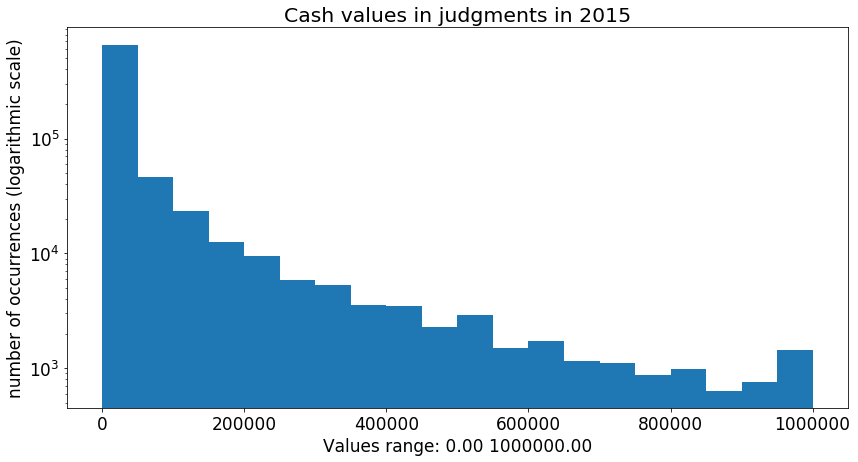

In [43]:
plotHistogram(all_values, min(all_values), 1e6, 20)

Elements matched:
[  2.18370000e+04   1.20000000e+01   2.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   2.00000000e+00   2.00000000e+00   3.00000000e+00   2.00000000e+00
   1.00000000e+00   1.00000000e+00   2.00000000e+00   0.00000000e+00]
Bins boundaries:
[  1.00000000e+06   1.50009500e+10   3.00009000e+10   4.50008500e+10
   6.00008000e+10   7.50007500e+10   9.00007000e+10   1.05000650e+11
   1.20000600e+11   1.35000550e+11   1.50000500e+11   1.65000450e+11
   1.80000400e+11   1.95000350e+11   2.10000300e+11   2.25000250e+11
   2.40000200e+11   2.55000150e+11   2.70000100e+11   2.85000050e+11
   3.00000000e+11]


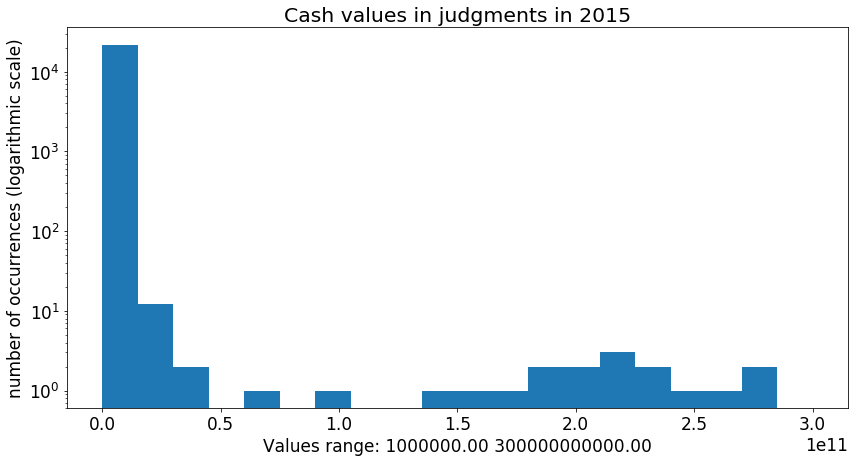

In [46]:
plotHistogram(all_values, 1e6, 3e11, 20)

### Określ liczbę orzeczeń odwołujących się w określonym roku do artykułu 445 Ustawy z dnia 23 kwietnia 1964 r.- Kodeks cywilny.

In [52]:
def articleMentionedInRegulations(regulations):
    for reg in regulations:
        if reg['journalNo'] == 16 and reg['journalYear'] == 1964 and reg['journalEntry'] == 93 and "445" in reg['text']:
            return True
    return False;

def getJudgmentsNumByArticle(jsons_dir):
    pattern = os.path.join(jsons_dir, 'judgments*.json')
    i = 0
    articles_num = 0
    for file_name in glob(pattern):
        i = i+1
        if i%200 == 0:
            print("already done files: ", i)
        with open(file_name) as f:
            curr_json = json.load(f)
            items = curr_json['items']
            # print(items)
            for item in items:
                if '2015' in item['judgmentDate']:
                    regulations = item['referencedRegulations']
                    if articleMentionedInRegulations(regulations):
                        articles_num = articles_num + 1
    return articles_num

In [54]:
jsons_dir_full = '../data/json/'
articles_num = getJudgmentsNumByArticle(jsons_dir_full)
print("Judgments reffering to article 445: ", articles_num)

already done files:  50
already done files:  100
already done files:  150
already done files:  200
already done files:  250
already done files:  300
already done files:  350
already done files:  400
already done files:  450
already done files:  500
already done files:  550
already done files:  600
already done files:  650
already done files:  700
already done files:  750
already done files:  800
already done files:  850
already done files:  900
already done files:  950
already done files:  1000
already done files:  1050
already done files:  1100
already done files:  1150
already done files:  1200
already done files:  1250
already done files:  1300
already done files:  1350
already done files:  1400
already done files:  1450
already done files:  1500
already done files:  1550
already done files:  1600
already done files:  1650
already done files:  1700
already done files:  1750
already done files:  1800
already done files:  1850
already done files:  1900
already done files:  1950
alread

### Określ liczbę orzeczeń w określonym roku, które zawierają słowo szkoda w dowolnej formie fleksyjnej.

In [56]:
def contentContainsWord(text_content):
    regex = r"[^a-zA-Z](szkod[a|y|zie|ę|o|om|ami|ach]|szkód)[^a-zA-Z]"
    return bool(re.search(regex, text_content))



def getJudgmentsNumByWord(jsons_dir):
    pattern = os.path.join(jsons_dir, 'judgments*.json')
    i = 0
    articles_num = 0
    for file_name in glob(pattern):
        i = i+1
        if i%200 == 0:
            print("already done files: ", i)
        with open(file_name) as f:
            curr_json = json.load(f)
            items = curr_json['items']
            for item in items:
                if '2015' in item['judgmentDate']:
                    text_content = item['textContent']
                    if contentContainsWord(text_content):
                        articles_num = articles_num + 1
    return articles_num

In [57]:
jsons_dir_full = '../data/json/'
matchingJudgments = getJudgmentsNumByWord(jsons_dir_full)
print("Judgements in 2015 containing word 'szkoda': ", matchingJudgments)

already done files:  200
already done files:  400
already done files:  600
already done files:  800
already done files:  1000
already done files:  1200
already done files:  1400
already done files:  1600
already done files:  1800
already done files:  2000
already done files:  2200
already done files:  2400
already done files:  2600
already done files:  2800
already done files:  3000
Judgements in 2015 containing word 'szkoda':  17767
